In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('main_cookie.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,count
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,247.0,...,248.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,246.0,...,247.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,244.0,244.0,244.0,...,247.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
df.rename(columns = {'count':'chocochip_count'}, inplace=True)
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,chocochip_count
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,247.0,...,248.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,246.0,...,247.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,244.0,244.0,244.0,...,247.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,550,0.0,0.0,0.0,0.0,0.0,246.0,245.0,246.0,245.0,...,247.0,247.0,247.0,247.0,0.0,0.0,0.0,0.0,0.0,15
551,551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
552,552,0.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,...,246.0,245.0,245.0,245.0,245.0,244.0,244.0,244.0,0.0,15
553,553,0.0,244.0,244.0,245.0,245.0,245.0,245.0,245.0,246.0,...,247.0,247.0,247.0,247.0,247.0,247.0,247.0,246.0,0.0,15


In [4]:
df.iloc[:,:-1]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,247.0,...,246.0,248.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,246.0,...,244.0,247.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,244.0,244.0,244.0,...,192.0,247.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,550,0.0,0.0,0.0,0.0,0.0,246.0,245.0,246.0,245.0,...,235.0,247.0,247.0,247.0,247.0,0.0,0.0,0.0,0.0,0.0
551,551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,552,0.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,...,250.0,246.0,245.0,245.0,245.0,245.0,244.0,244.0,244.0,0.0
553,553,0.0,244.0,244.0,245.0,245.0,245.0,245.0,245.0,246.0,...,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,246.0,0.0


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,chocochip_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,247.0,246.0,...,248.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,...,247.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,244.0,244.0,244.0,158.0,...,247.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.0,0.0,0.0,0.0,0.0,246.0,245.0,246.0,245.0,245.0,...,247.0,247.0,247.0,247.0,0.0,0.0,0.0,0.0,0.0,15
551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
552,0.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,...,246.0,245.0,245.0,245.0,245.0,244.0,244.0,244.0,0.0,15
553,0.0,244.0,244.0,245.0,245.0,245.0,245.0,245.0,246.0,247.0,...,247.0,247.0,247.0,247.0,247.0,247.0,247.0,246.0,0.0,15


In [6]:
#x_train = df.iloc[:,:-1]
#y_train = df['chocochip_count']

#x_test = 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['chocochip_count'], test_size = 0.30, random_state = 43)

Accuracy_Score:

0.0658682634730539
Confusion Matrix

[[ 2  2  3  3  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  5  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  2  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  2  0  3  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  9  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  6  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  5  1  3  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  3  0  6  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  2  0  6  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  5  0  6  1]
 [ 0  0  0  0  0  0  0  0  0  1  1  1  4  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  3  5  0]]


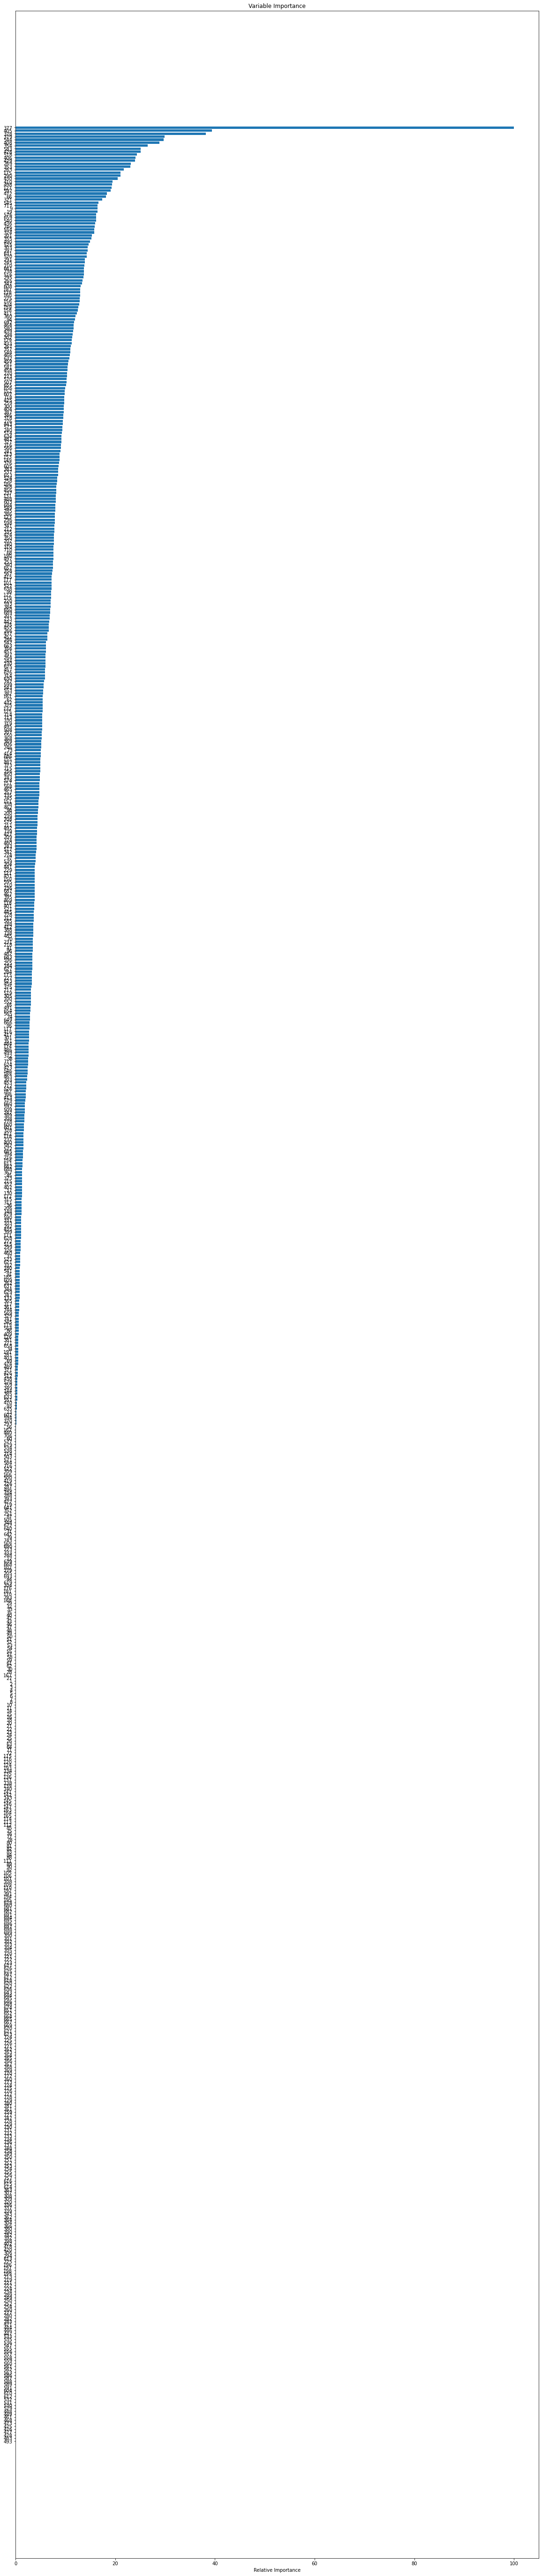

In [8]:
gbm = GradientBoostingClassifier(n_estimators=20, learning_rate=0.2, loss='deviance', random_state=43, warm_start=True)
gbm.fit(x_train,y_train)
predictions = gbm.predict(x_test)

print('Accuracy_Score:\n')
print(gbm.score(x_test, y_test))
print('Confusion Matrix\n')
print(confusion_matrix(y_test, predictions))
feature_importance = gbm.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,100))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [10]:
gbm_reg = GradientBoostingRegressor(n_estimators=500, random_state=43, learning_rate=0.1, loss='huber', alpha=0.9, max_depth=3)
gbm_reg.fit(x_train, y_train)
predictions_reg = gbm_reg.predict(x_test)

print('Accuracy_Score\n')
print(gbm_reg.score(x_test, y_test))



Accuracy_Score

0.9327057000923847
